# Análise de Agrupamento - Dataset Digits

Realize uma análise de agrupamento no conjunto de dados Digits usando o KNN. Encontre o melhor valor de K, justificando sua resposta. Use o coeficiente de silhueta para verificar se os grupos estão bem formados. O que cada grupo significa? há algum elemento em algum grupo que não deveria estar lá?

PS. Não use informações de rótulo.

# Análise Exploratória

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

In [ ]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
print(digits.images.shape)

(1797, 8, 8)


In [ ]:
print(digits.target.shape)

(1797,)


In [ ]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

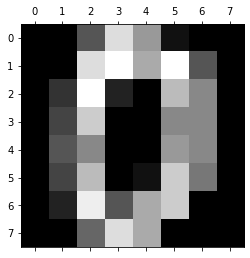

In [ ]:
print(digits.images[0])

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

Obs: nesta amostra dos primeiros elementos, as imagens formadas pelos rótulos 5 e 9 são bastante parecidas.

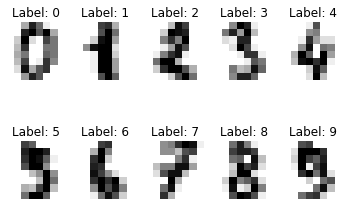

In [ ]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:10]):
    # initialize a subplot of 2X5 at the i+1-th position
    plt.subplot(2, 5, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Label: ' + str(label))

# Show the plot
plt.show()

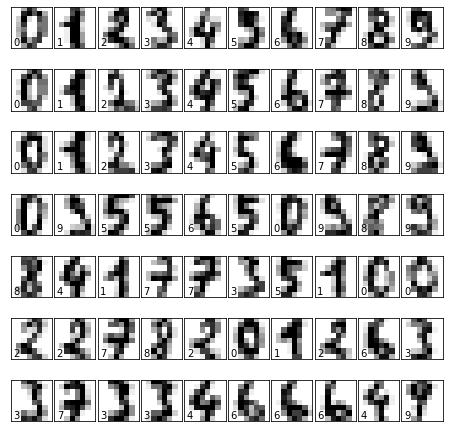

In [ ]:
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 70 images
for i in range(70):
    # Initialize the subplots: add a subplot in the grid of 7 by 10, at the i+1-th position
    ax = fig.add_subplot(7, 10, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

In [ ]:
df_digits = pd.DataFrame(
    digits.data,
    columns=[f'px{i}' for i in range(64)]
)
df_digits['label'] = digits.target

df_digits.head()

,px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15,px16,px17,px18,px19,px20,px21,px22,px23,px24,px25,px26,px27,px28,px29,px30,px31,px32,px33,px34,px35,px36,px37,px38,px39,px40,px41,px42,px43,px44,px45,px46,px47,px48,px49,px50,px51,px52,px53,px54,px55,px56,px57,px58,px59,px60,px61,px62,px63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   px0     1797 non-null   float64
 1   px1     1797 non-null   float64
 2   px2     1797 non-null   float64
 3   px3     1797 non-null   float64
 4   px4     1797 non-null   float64
 5   px5     1797 non-null   float64
 6   px6     1797 non-null   float64
 7   px7     1797 non-null   float64
 8   px8     1797 non-null   float64
 9   px9     1797 non-null   float64
 10  px10    1797 non-null   float64
 11  px11    1797 non-null   float64
 12  px12    1797 non-null   float64
 13  px13    1797 non-null   float64
 14  px14    1797 non-null   float64
 15  px15    1797 non-null   float64
 16  px16    1797 non-null   float64
 17  px17    1797 non-null   float64
 18  px18    1797 non-null   float64
 19  px19    1797 non-null   float64
 20  px20    1797 non-null   float64
 21  px21    1797 non-null   float64
 22  

In [ ]:
df_digits.describe()

,px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15,px16,px17,px18,px19,px20,px21,px22,px23,px24,px25,px26,px27,px28,px29,px30,px31,px32,px33,px34,px35,px36,px37,px38,px39,px40,px41,px42,px43,px44,px45,px46,px47,px48,px49,px50,px51,px52,px53,px54,px55,px56,px57,px58,px59,px60,px61,px62,px63,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.00

In [ ]:
labels_count = df_digits['label'].value_counts().sort_index()
labels_count.index = [f'Contagem do número {i}:' for i in range(10)]
labels_count

Contagem do número 0:    178
Contagem do número 1:    182
Contagem do número 2:    177
Contagem do número 3:    183
Contagem do número 4:    181
Contagem do número 5:    182
Contagem do número 6:    181
Contagem do número 7:    179
Contagem do número 8:    174
Contagem do número 9:    180
Name: label, dtype: int64

In [ ]:
# Determinar a proporção de cada label em relação ao dataset
labels_proportion = (df_digits['label'].value_counts(normalize=True) * 100).sort_index()
labels_proportion.index = [f'Proporção número {i}:' for i in range(10)]
labels_proportion

Proporção número 0:     9.905398
Proporção número 1:    10.127991
Proporção número 2:     9.849750
Proporção número 3:    10.183639
Proporção número 4:    10.072343
Proporção número 5:    10.127991
Proporção número 6:    10.072343
Proporção número 7:     9.961046
Proporção número 8:     9.682805
Proporção número 9:    10.016694
Name: label, dtype: float64

In [ ]:
# Validando a soma das proporções de cada número
print(f'{labels_proportion.sum()}%')

100.0%


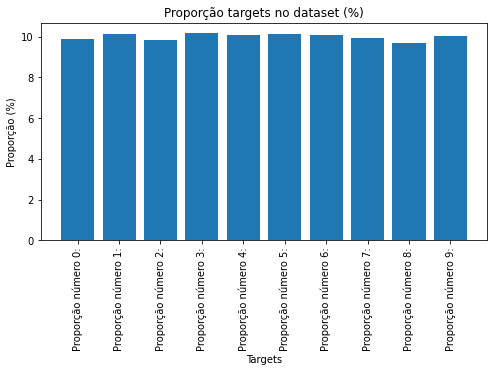

In [ ]:
plt.figure(figsize=(8, 4))

plt.bar(labels_proportion.index, labels_proportion)
plt.title("Proporção targets no dataset (%)")
plt.xticks(rotation=90)
plt.xlabel("Targets")
plt.ylabel("Proporção (%)")
plt.show()

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(digits.data)

In [ ]:
colors = ['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'dodgerblue', 'blue', 'magenta', 'purple']

In [ ]:
df_pca = pd.DataFrame(
    X_pca, 
    columns=[f'PC{i}' for i in range(1, 9)]
)

color_map = {
    '0': colors[0],
    '1': colors[1],
    '2': colors[2],
    '3': colors[3],
    '4': colors[4],
    '5': colors[5],
    '6': colors[6],
    '7': colors[7],
    '8': colors[8],
    '9': colors[9]
}

df_pca['target'] = pd.Series(digits.target, dtype=np.str)
df_pca['target'] = df_pca['target'].map(color_map)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,target
0,-1.259492,21.274807,-9.463523,13.014185,-7.128961,-7.446638,3.242242,2.572200,red
1,7.957605,-20.768452,4.439765,-14.894583,5.891792,-6.480986,2.123403,-4.665532,orange
2,6.991922,-9.956044,2.959171,-12.289757,-18.110929,-4.536796,1.855863,-16.295482,yellow
3,-15.906116,3.332423,9.824063,-12.275322,6.961546,1.088743,-1.049487,10.959494,lime
4,23.307014,4.269320,-5.674321,-13.851845,-0.358090,-2.833602,-0.697343,13.008440,green


In [ ]:
df_pca.shape

(1797, 9)

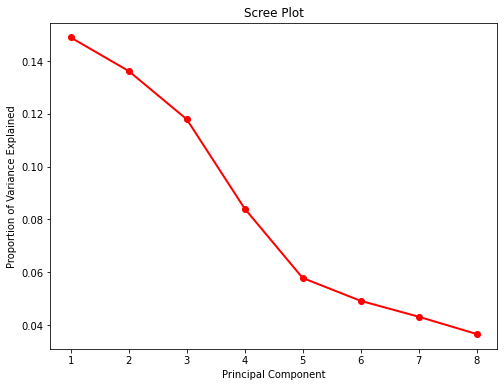

In [ ]:
PC_values = np.arange(pca.n_components_) + 1

plt.figure(figsize=(8, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### Visualizando os dados

In [ ]:
import plotly.express as px

def plot_pca_with_twopcs(X, y, colors, title="PCA Scatter Plot"):
  plt.figure(figsize=(10, 6))

  X_pca = pca.fit_transform(X)

  for i in range(len(colors)):
    x_plot = X_pca[:, 0][y == i]
    y_plot = X_pca[:, 1][y == i]
    plt.scatter(x_plot, y_plot, c=colors[i], alpha=0.9)

  plt.legend(colors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.title(title)
  plt.show()

def plot_pca_with_three_pcs(df, target, colors):
  fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=target, color_discrete_sequence=colors)
  fig.show()

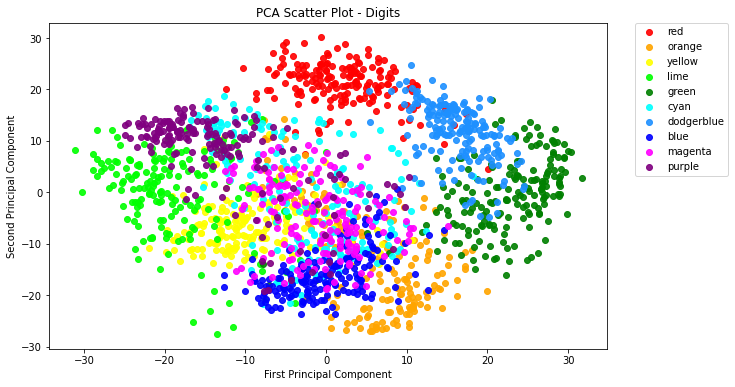

In [ ]:
plot_pca_with_twopcs(digits.data, digits.target, colors, title="PCA Scatter Plot - Digits")

In [ ]:
plot_pca_with_three_pcs(df_pca, 'target', colors)

# Algoritmos de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = digits.data
y = digits.target

In [ ]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [ ]:
print(X_train.shape)

(1347, 64)


In [ ]:
print(X_test.shape)

(450, 64)


## K-NEAREST-NEIGHBORS (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
k_values = np.arange(3, 222, 2)
accuracies = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append((k, acc))
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9844444444444445
K = 5; Accuracy: 0.9866666666666667
K = 7; Accuracy: 0.9844444444444445
K = 9; Accuracy: 0.9866666666666667
K = 11; Accuracy: 0.98
K = 13; Accuracy: 0.9733333333333334
K = 15; Accuracy: 0.9733333333333334
K = 17; Accuracy: 0.9733333333333334
K = 19; Accuracy: 0.9711111111111111
K = 21; Accuracy: 0.9666666666666667
K = 23; Accuracy: 0.96
K = 25; Accuracy: 0.9622222222222222
K = 27; Accuracy: 0.9577777777777777
K = 29; Accuracy: 0.9533333333333334
K = 31; Accuracy: 0.9533333333333334
K = 33; Accuracy: 0.9488888888888889
K = 35; Accuracy: 0.9488888888888889
K = 37; Accuracy: 0.9511111111111111
K = 39; Accuracy: 0.9466666666666667
K = 41; Accuracy: 0.9466666666666667
K = 43; Accuracy: 0.9444444444444444
K = 45; Accuracy: 0.9377777777777778
K = 47; Accuracy: 0.9333333333333333
K = 49; Accuracy: 0.9355555555555556
K = 51; Accuracy: 0.9311111111111111
K = 53; Accuracy: 0.9355555555555556
K = 55; Accuracy: 0.9311111111111111
K = 57; Accuracy: 0.9333333333333

In [ ]:
silhouettes = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  silhouette_avg = silhouette_score(X_test, y_pred)
  silhouettes.append((k, silhouette_avg))
  print("K = "+str(k)+"; O coeficiente de silhoueta é : "+str(silhouette_avg))

K = 3; O coeficiente de silhoueta é : 0.1676007634511347
K = 5; O coeficiente de silhoueta é : 0.16733084585883753
K = 7; O coeficiente de silhoueta é : 0.168443790293351
K = 9; O coeficiente de silhoueta é : 0.16861666985532514
K = 11; O coeficiente de silhoueta é : 0.17076482467129184
K = 13; O coeficiente de silhoueta é : 0.16948616690985904
K = 15; O coeficiente de silhoueta é : 0.1708423051407192
K = 17; O coeficiente de silhoueta é : 0.1708423051407192
K = 19; O coeficiente de silhoueta é : 0.17152176372135
K = 21; O coeficiente de silhoueta é : 0.17204894096386206
K = 23; O coeficiente de silhoueta é : 0.17014666806765086
K = 25; O coeficiente de silhoueta é : 0.169457998623189
K = 27; O coeficiente de silhoueta é : 0.16793400299208372
K = 29; O coeficiente de silhoueta é : 0.16816921205638324
K = 31; O coeficiente de silhoueta é : 0.16980380377281493
K = 33; O coeficiente de silhoueta é : 0.16829404871802398
K = 35; O coeficiente de silhoueta é : 0.16934623476736557
K = 37; O c

In [ ]:
# Pegando apenas os valores das tuplas nas listas
accuracies_values = [acc for k, acc in accuracies]
silhouettes_values = [slt for k, slt in silhouettes]

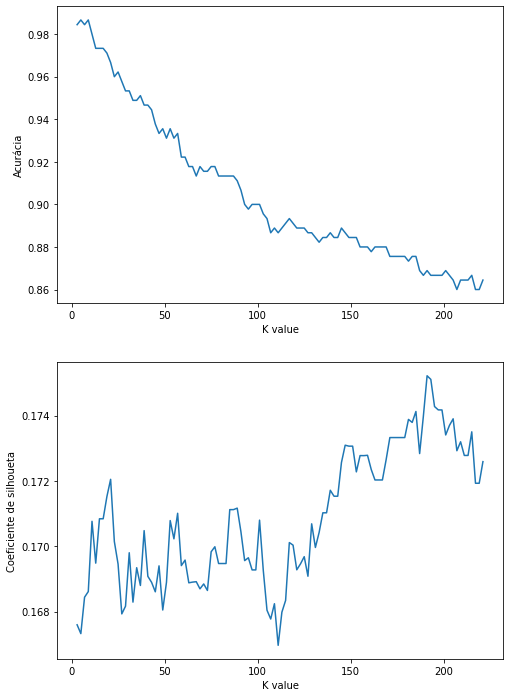

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
plt.plot(k_values, accuracies_values)
plt.xlabel('K value')
plt.ylabel('Acurácia')

plt.subplot(2, 1, 2)
plt.plot(k_values, silhouettes_values)
plt.xlabel('K value')
plt.ylabel('Coeficiente de silhoueta')

plt.show()

In [ ]:
# Imprimir os valores de acurácia e cof de silhueta para o maior valor na lista em k
def print_acc_slt_max_k(accuracies, silhouettes, criterion_list):
  k, acc = accuracies[np.argmax(criterion_list)]
  k, slt = silhouettes[np.argmax(criterion_list)]

  print(f'Lista com {len(accuracies)} elementos:')
  print(f'Para k={k}, acurácia={acc}')
  print(f'Para k={k}, cof_silhueta={slt}')

In [ ]:
print_acc_slt_max_k(accuracies, silhouettes, accuracies_values)

Lista com 110 elementos:
Para k=5, acurácia=0.9866666666666667
Para k=5, cof_silhueta=0.16733084585883753


In [ ]:
print_acc_slt_max_k(accuracies, silhouettes, silhouettes_values)

Lista com 110 elementos:
Para k=191, acurácia=0.8688888888888889
Para k=191, cof_silhueta=0.1752150511187575


In [ ]:
# Pegando apenas até k=111 (55 elementos)
accuracies_values_to_hundred = accuracies_values[:55]
silhouettes_values_to_hundred = silhouettes_values[:55]

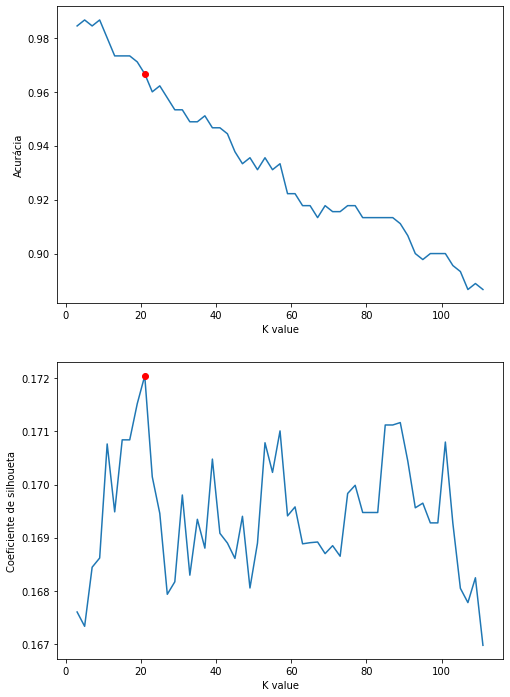

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
plt.plot(k_values[:55], accuracies_values_to_hundred)
plt.plot(21, 0.9666666666666667, 'ro')
plt.xlabel('K value')
plt.ylabel('Acurácia')

plt.subplot(2, 1, 2)
plt.plot(k_values[:55], silhouettes_values_to_hundred)
plt.plot(21, 0.17204894096386206, 'ro')
plt.xlabel('K value')
plt.ylabel('Coeficiente de silhoueta')

plt.show()

In [ ]:
print_acc_slt_max_k(accuracies[:55], silhouettes[:55], accuracies_values_to_hundred)

Lista com 55 elementos:
Para k=5, acurácia=0.9866666666666667
Para k=5, cof_silhueta=0.16733084585883753


In [ ]:
print_acc_slt_max_k(accuracies[:55], silhouettes[:55], silhouettes_values_to_hundred)

Lista com 55 elementos:
Para k=21, acurácia=0.9666666666666667
Para k=21, cof_silhueta=0.17204894096386206


### Modelo com k=21

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

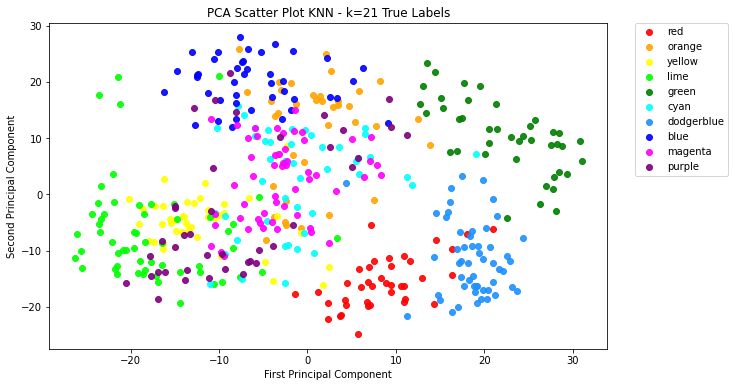

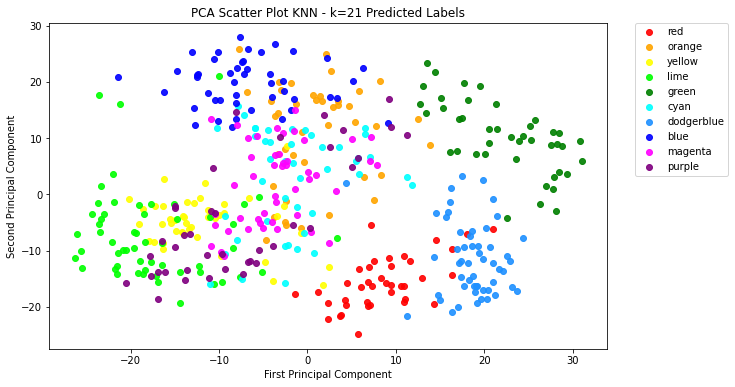

In [ ]:
plot_pca_with_twopcs(X_test, y_test, colors, title="PCA Scatter Plot KNN - k=21 True Labels")
plot_pca_with_twopcs(X_test, y_pred, colors, title="PCA Scatter Plot KNN - k=21 Predicted Labels")

### Avaliando Modelo

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  #print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


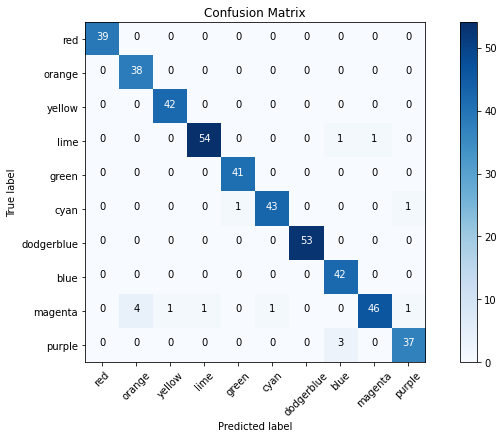

In [ ]:
cm_plot_labels = colors
plt.figure(figsize=(10, 6))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

acc = accuracy_score(y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)
print("Accuracy \n", acc)

Precision 
 [1.         0.9047619  0.97674419 0.98181818 0.97619048 0.97727273
 1.         0.91304348 0.9787234  0.94871795]

Recall 
 [1.         1.         1.         0.96428571 1.         0.95555556
 1.         1.         0.85185185 0.925     ]

F-score 
 [1.         0.95       0.98823529 0.97297297 0.98795181 0.96629213
 1.         0.95454545 0.91089109 0.93670886]
Accuracy 
 0.9666666666666667


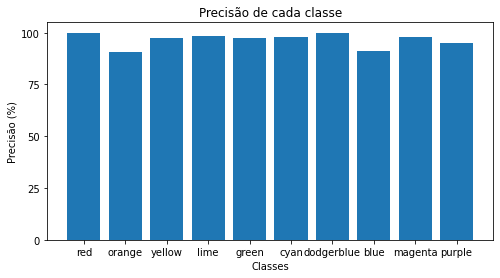

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(colors, list(map(lambda x : x*100, precision)))
plt.title("Precisão de cada classe")
plt.xlabel("Classes")
plt.ylabel("Precisão (%)")
plt.yticks([x for x in range(0, 101, 25)])
plt.show()

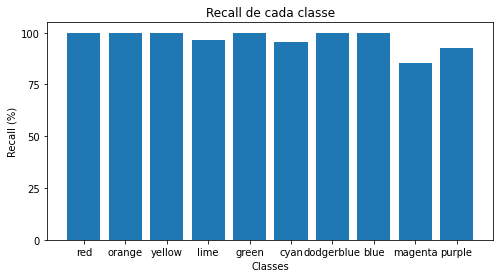

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(colors, list(map(lambda x : x*100, recall)))
plt.title("Recall de cada classe")
plt.xlabel("Classes")
plt.ylabel("Recall (%)")
plt.yticks([x for x in range(0, 101, 25)])
plt.show()

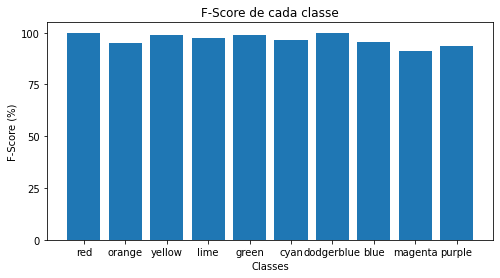

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(colors, list(map(lambda x : x*100, fscore)))
plt.title("F-Score de cada classe")
plt.xlabel("Classes")
plt.ylabel("F-Score (%)")
plt.yticks([x for x in range(0, 101, 25)])
plt.show()

In [ ]:
print(f'Acurácia: {acc*100:.2f}%')

Acurácia: 96.67%


## Outro modelo

In [ ]:
# Modelo com o dataset inteiro
n_digits = 10
n_pcs = 2
k=21

reduced_data = PCA(n_components=n_pcs).fit_transform(digits.data)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_data, digits.target)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

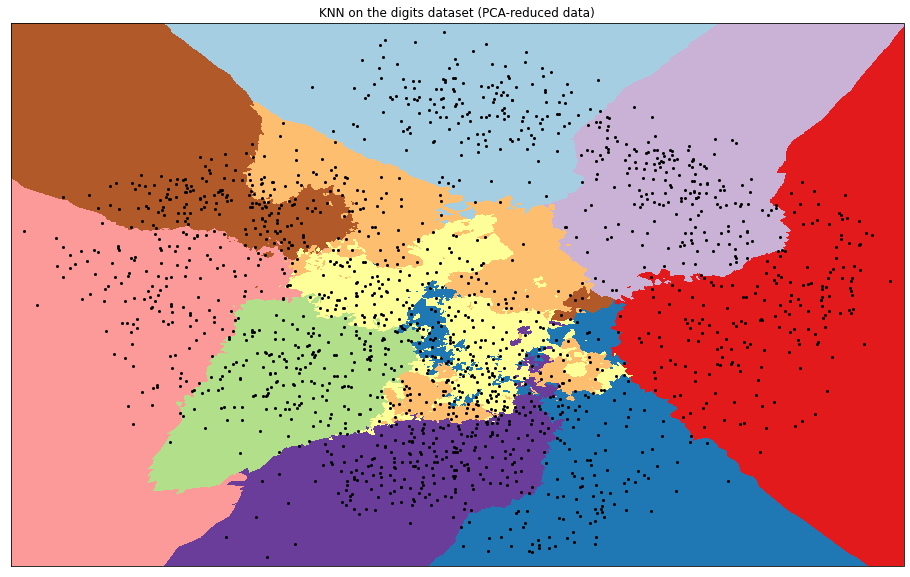

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 10))
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)

plt.title("KNN on the digits dataset (PCA-reduced data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

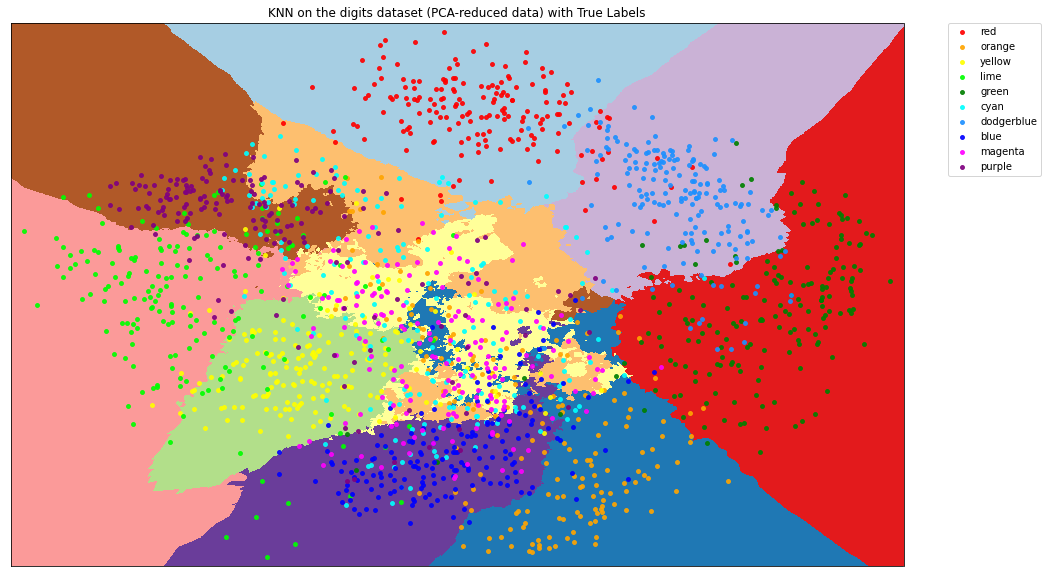

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 10))
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

for i in range(len(colors)):
    x_plot = reduced_data[:, 0][digits.target == i]
    y_plot = reduced_data[:, 1][digits.target == i]
    plt.scatter(x_plot, y_plot, c=colors[i], s=15, alpha=0.9)
    
plt.legend(colors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("KNN on the digits dataset (PCA-reduced data) with True Labels")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

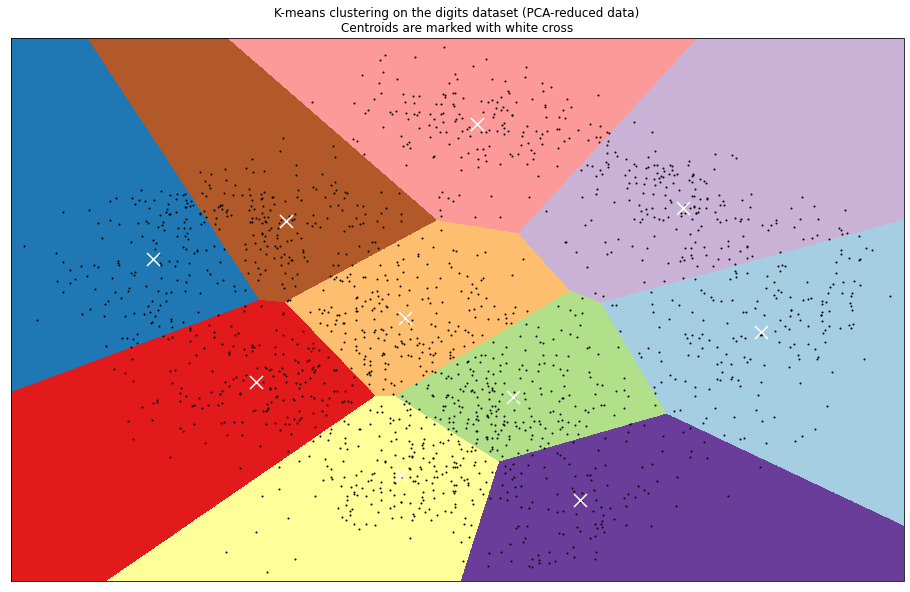

In [ ]:
from sklearn.cluster import KMeans

# Modelo com KMeans
n_digits=10

reduced_data = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 10))
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()